In [1]:
# Внимание!!! Важно, что бы файлы с данными и исполняемый файл находились в одной папке, 
# тогда пути к тестовым и тренировочным наборам будут содержать только имена файлов.
# 
# В пути к тренировочным и тестовым данным запрежается использовать абсалютную адресацию, 
# то есть адресацию, в которой присутствуют имена папок. Путь должен содержать только имя файла.
#
# Напоминание: под моделью машинного обучения понимаются все действия с исходными данными, 
# которые необходимо произвести, что бы сопоставить признаки целевому значению.

### Область работы 1 (библиотеки)

In [2]:
# Данный блок в области 1 НЕ выполняется преподавателем
# 
# данный блок предназначен только для подключения необходимых библиотек
# запрещается подключать библиотеки в других блоках
# запрещается скрывать предупреждения системы
# установка дополнительных библиотек размещается прямо здесь (обязательно закоментированы)
# pip install

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold, StratifiedShuffleSplit 

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer
import category_encoders as ce

from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
from sklearn.linear_model import  Lars, OrthogonalMatchingPursuit, SGDRegressor, BayesianRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

from sklearn.metrics import mean_absolute_percentage_error

from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification

from sklearn.feature_selection  import RFE
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import VarianceThreshold

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.inspection import permutation_importance

from scipy.stats import spearmanr
from scipy.spatial.distance import squareform
from scipy.cluster import hierarchy
from collections import defaultdict
from sklearn.preprocessing import PowerTransformer

from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

### Область работы 2 (поиск  модели .... )

In [4]:
# Данный блок(и) НЕ выполняются преподавателем в области 2
# блок(и) предназначены для поиска лучшей модели 
# должен быть понятен и очевиден отбор параметров модели
# оставляйте свои комментарии и разъяснения
# 
# Запрещается размещать данные блоки за пределами обасти 2
# Все блоки данной области должны быть выполнены
#
# ЗАПРЕЩАЕТСЯ ИСПОЛЬЗОВАТЬ ТЕСТОВЫЙ НАБОР
#
# Путь к тренировочному набору
# 

path_train = 'train_house_A.csv' # содержит только имя файла, без имен папок !!!

In [5]:
df = pd.read_csv(path_train)

In [6]:
display(df.head())
display(df.info())
display(df.describe())

,price,0,1,2,3,4,5,6,7,8,...,19,20,21,22,23,24,25,26,27,28
0,5320000,0.405623,0.0,-0.061169,-0.741051,-0.223185,1.361397,1.221991,-0.570187,-0.478408,...,0.245475,-0.263991,0.047278,1.222962,-0.219265,1.804941,-0.126718,0.271470,1.391006,-0.141322
1,3465000,0.405623,0.0,-0.826890,-0.867066,-0.223185,-0.734539,-0.964205,-0.570187,-0.478408,...,-1.444928,-0.263991,0.047278,1.222962,-0.219265,-0.554035,-0.126718,-1.010746,0.617421,-0.141322
2,3500000,0.405623,0.0,-0.963310,-1.676106,-0.223185,-0.734539,-0.692084,-0.570187,-0.478408,...,1.578828,-0.263991,0.047278,1.222962,-0.219265,-0.554035,-0.126718,-1.237596,1.483005,-0.141322
3,3570000,0.405623,0.0,0.242611,0.193424,-0.223185,-0.734539,-0.696696,-0.570187,1.307431,...,-1.675466,-0.263991,-1.308863,1.222962,-0.219265,-0.554035,0.417348,-0.987324,1.134657,-0.141322
4,4130000,0.405623,0.0,-0.740827,-0.684767,-0.223185,-0.734539,-0.239163,-0.570187,-0.478408,...,-1.347578,-0.263991,1.403419,-0.091662,-0.219265,-0.554035,-0.108582,0.838006,0.360062,-0.141322


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 408 entries, 0 to 407
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   408 non-null    int64  
 1   0       408 non-null    float64
 2   1       408 non-null    float64
 3   2       408 non-null    float64
 4   3       408 non-null    float64
 5   4       408 non-null    float64
 6   5       408 non-null    float64
 7   6       408 non-null    float64
 8   7       408 non-null    float64
 9   8       408 non-null    float64
 10  9       408 non-null    float64
 11  10      408 non-null    float64
 12  11      408 non-null    float64
 13  12      408 non-null    float64
 14  13      408 non-null    float64
 15  14      408 non-null    float64
 16  15      408 non-null    float64
 17  16      408 non-null    float64
 18  17      408 non-null    float64
 19  18      408 non-null    float64
 20  19      408 non-null    float64
 21  20      408 non-null    float64
 22  21

None

,price,0,1,2,3,4,5,6,7,8,...,19,20,21,22,23,24,25,26,27,28
count,4.080000e+02,408.000000,408.0,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,...,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000
mean,4.643597e+06,-0.030652,0.0,-0.021898,-0.004470,-0.044734,-0.015345,-0.037179,0.005930,-0.005686,...,-0.046552,-0.022184,-0.042466,0.017890,-0.043530,-0.039454,-0.038181,-0.048110,-0.025252,-0.044926
std,1.711368e+06,1.031893,0.0,1.019428,0.974612,0.969756,0.996282,1.001595,0.976837,1.007006,...,0.991383,1.020601,0.995270,1.016147,0.900616,0.975409,1.031259,1.008422,1.001805,0.913917
min,1.750000e+06,-2.465344,0.0,-1.224688,-1.780233,-2.633407,-0.734539,-1.614530,-0.570187,-4.050087,...,-1.705711,-2.319351,-2.665004,-1.406286,-0.219265,-0.554035,-5.000645,-1.789595,-1.705457,-3.418780
25%,3.430000e+06,0.405623,0.0,-0.673496,-0.837351,-0.223185,-0.734539,-0.745125,-0.570187,-0.478408,...,-0.881357,-0.263991,-1.308863,-1.406286,-0.219265,-0.554035,-0.126718,-0.896013,-0.887341,-0.141322
50%,4.270000e+06,0.405623,0.0,-0.252391,0.032263,-0.223185,-0.734539,-0.300045,-0.570187,-0.478408,...,-0.072463,-0.263991,0.047278,-0.091662,-0.219265,-0.554035,-0.126718,-0.047954,-0.050893,-0.141322
75%,5.600000e+06,0.405623,0.0,0.312075,0.775898,-0.223185,1.361397,0.454055,1.421812,1.307431,...,0.755884,-0.263991,0.047278,1.222962,-0.219265,-0.554035,-0.006287,0.787204,0.798591,-0.141322
max,1.141000e+07,0.405623,0.0,8.604753,1.732550,13.826353,1.361397,5.096263,3.413810,3.093270,...,1.745647,7.957450,4.115701,1.222962,4.560702,1.804941,13.021551,1.732996,1.771548,3.136137


In [7]:
df.drop_duplicates(inplace=True)
# удалить пропущенные данные (их нет)
display(df.isna().sum())

price    0
0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       0
25       0
26       0
27       0
28       0
dtype: int64

In [8]:
X = df.iloc[:,1:]
y = df.iloc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [9]:
#удаление признаков с низкой дисперсией
th = 0.8
transform_threshold = VarianceThreshold(threshold=(th * (1 - th)))
transform_threshold.fit_transform(X_train)

array([[ 0.40562287, -0.52696945, -1.62129134, ..., -1.48543184,
        -0.26028113, -0.14132159],
       [ 0.40562287, -0.44927442,  0.14064002, ..., -0.36718178,
         0.37203848, -0.14132159],
       [ 0.40562287,  1.09699076,  0.51518062, ..., -1.34889544,
        -1.45944185, -1.78005066],
       ...,
       [ 0.40562287, -1.01438276,  1.45032913, ..., -0.89382761,
         0.17509663, -0.14132159],
       [ 0.40562287,  0.48921664,  0.22245932, ..., -0.84197929,
         0.97910618, -0.14132159],
       [ 0.40562287, -0.62877137,  1.29638117, ...,  0.15856786,
        -0.14401136, -0.14132159]])

array([ True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

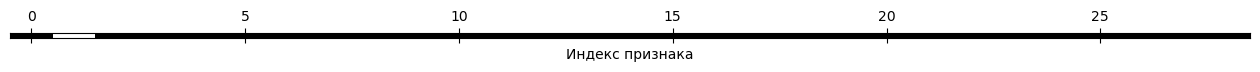

In [10]:
mask = transform_threshold.get_support()
plt.matshow( mask.reshape(1,-1), cmap = 'gray_r', aspect=0.1);
plt.yticks([])
plt.xlabel("Индекс признака")
transform_threshold.get_support()

In [11]:
# Удаляем столбец "1"
X_train.drop('1', axis = 1, inplace=True)
X_test.drop('1', axis = 1, inplace=True)

In [12]:
X_train

,0,2,3,4,5,6,7,8,9,10,...,19,20,21,22,23,24,25,26,27,28
158,0.405623,-0.526969,-1.621291,-0.223185,-0.734539,-0.917161,-0.570187,-0.478408,-0.465315,-0.024866,...,-0.279731,-0.263991,0.047278,-1.406286,-0.219265,-0.554035,-0.126718,-1.485432,-0.260281,-0.141322
109,0.405623,-0.449274,0.140640,-0.223185,-0.734539,-1.386224,-0.570187,-0.478408,-0.465315,-1.227462,...,-0.116015,-0.263991,0.047278,1.222962,-0.219265,1.804941,-0.126718,-0.367182,0.372038,-0.141322
17,0.405623,1.096991,0.515181,-1.083113,1.361397,-0.908859,1.421812,1.307431,-0.465315,0.670729,...,-0.713221,-2.319351,-1.308863,-0.091662,-0.219265,-0.554035,0.678047,-1.348895,-1.459442,-1.780051
237,0.405623,-0.832079,1.092103,0.200724,-0.734539,0.068934,1.421812,-0.478408,-0.465315,-0.024866,...,0.796505,3.846729,2.759560,-0.091662,-0.219265,-0.554035,0.666712,0.467307,0.335527,-0.141322
24,-2.465344,-0.501194,-1.632484,0.951647,-0.734539,0.640850,1.421812,-0.478408,-0.465315,-0.024866,...,-0.648314,1.791369,1.403419,-0.091662,-0.219265,-0.554035,0.972749,1.342355,-0.103821,-0.141322
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,0.405623,-0.688510,-0.496317,-0.810601,-0.734539,-0.701308,1.421812,-0.478408,-0.465315,-0.024866,...,-0.876301,-0.263991,0.047278,-0.091662,4.560702,-0.554035,-0.126718,0.172292,-0.159081,-0.141322
106,0.405623,-0.538516,-0.035096,-0.283743,1.361397,-0.300045,1.421812,-0.478408,-0.465315,-0.024866,...,0.377628,1.791369,1.403419,-1.406286,-0.219265,-0.554035,-0.183392,-0.061906,1.425284,-0.141322
270,0.405623,-1.014383,1.450329,-0.223185,1.361397,0.391790,-0.570187,-0.478408,-0.465315,-0.024866,...,-0.125979,-0.263991,1.403419,-0.091662,-0.219265,-0.554035,0.666712,-0.893828,0.175097,-0.141322
348,0.405623,0.489217,0.222459,-0.223185,-0.734539,-0.770492,-0.570187,1.307431,-0.465315,0.523773,...,0.019378,-0.263991,-1.308863,-0.091662,-0.219265,1.804941,0.508026,-0.841979,0.979106,-0.141322


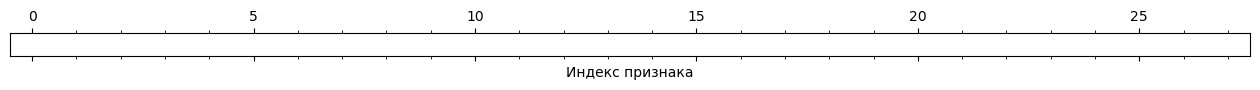

In [13]:
# рекурсивный отбор признаков
rfe_select = RFE(RandomForestRegressor(n_estimators=100, random_state=42),
             n_features_to_select=40)

rfe_select.fit(X_train, y_train)


# визуализируем отобранные признаки:
mask = rfe_select.get_support()
plt.matshow( mask.reshape(1,-1), cmap = 'gray_r', aspect=0.5)
plt.yticks([])
plt.gca().xaxis.set_minor_locator(plt.MultipleLocator(1))
plt.xlabel("Индекс признака");

In [14]:
pt = PowerTransformer(standardize = False).set_output(transform='pandas') # обратите внимание, что меняет опция  standardize
X_train_pt = pt.fit_transform(X_train)
X_test_pt  = pt.transform(X_test)

X_train = X_train_pt.copy()
X_test = X_test_pt.copy()

# forest = RandomForestRegressor(n_estimators=500, random_state=42)
# forest.fit(X_train, y_train)
# y_pred_train = forest.predict(X_train)
# y_pred = forest.predict(X_test)
# print("Score on train data: {:.2f}".format(forest.score(X_train, y_train)))
# print("Score on test data: {:.2f}".format(forest.score(X_test, y_test)))
# print(mean_absolute_percentage_error(y_test, y_pred))

In [15]:
forest = RandomForestRegressor(n_estimators=500, random_state=42)
forest.fit(X_train, y_train)
y_pred_train = forest.predict(X_train)
y_pred = forest.predict(X_test)
print("Score on train data: {:.2f}".format(forest.score(X_train, y_train)))
print("Score on test data: {:.2f}".format(forest.score(X_test, y_test)))
print(mean_absolute_percentage_error(y_test, y_pred))

Score on train data: 0.94
Score on test data: 0.57
0.20506716416629525


In [16]:
# # и SelectPercentile, чтобы выбрать 50% признаков
# select_pct = SelectPercentile(percentile=30)
# select_pct.fit(X_train, y_train)
# # преобразовываем обучающий набор
# X_train_selected = select_pct.transform(X_train)

# print("форма массива X_train: {}".format(X_train.shape))
# print("форма массива X_train_selected: {}".format(X_train_selected.shape))

# mask = select_pct.get_support()
# plt.matshow( mask.reshape(1,-1), cmap = 'gray_r', aspect=0.5)
# plt.yticks([])
# plt.xlabel("Индекс признака");

In [17]:
# forest = RandomForestRegressor(n_estimators=500, random_state=42)
# forest.fit(X_train_selected, y_train)
# y_pred_train = forest.predict(X_train_selected)
# X_test_selected = select_pct.transform(X_test)
# y_pred = forest.predict(X_test_selected)
# print("Score on train data: {:.2f}".format(forest.score(X_train_selected, y_train)))
# print("Score on test data: {:.2f}".format(forest.score(X_test_selected, y_test)))
# print(mean_absolute_percentage_error(y_test, y_pred))

,mean,std
23,0.039779,0.037939
7,0.056819,0.080709
4,0.076218,0.114243
16,0.086684,0.076164
6,0.293057,0.109149


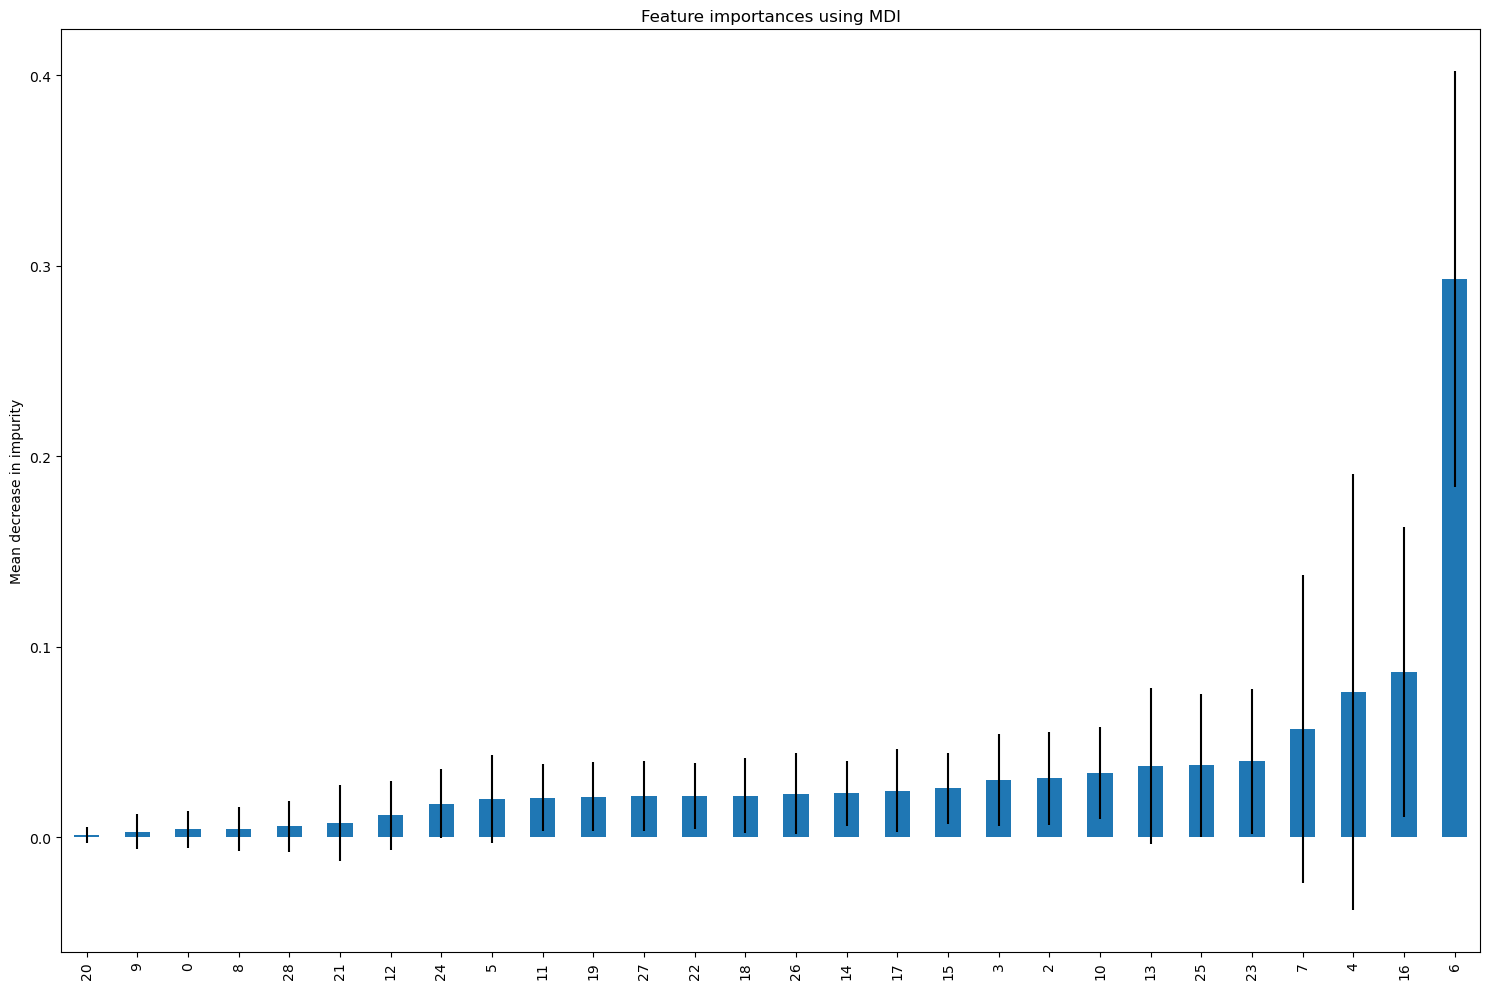

In [18]:
feature_names = X_train.columns
forest_importances = pd.DataFrame(forest.feature_importances_, index=feature_names, columns =['mean'])
forest_importances['std'] = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)

sort_forest = forest_importances.sort_values(by='mean')


fig, ax = plt.subplots(figsize=(15,10))
col = sort_forest['mean']
yerr = sort_forest['std']
col.plot.bar(yerr=yerr, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

display(sort_forest.tail(5))

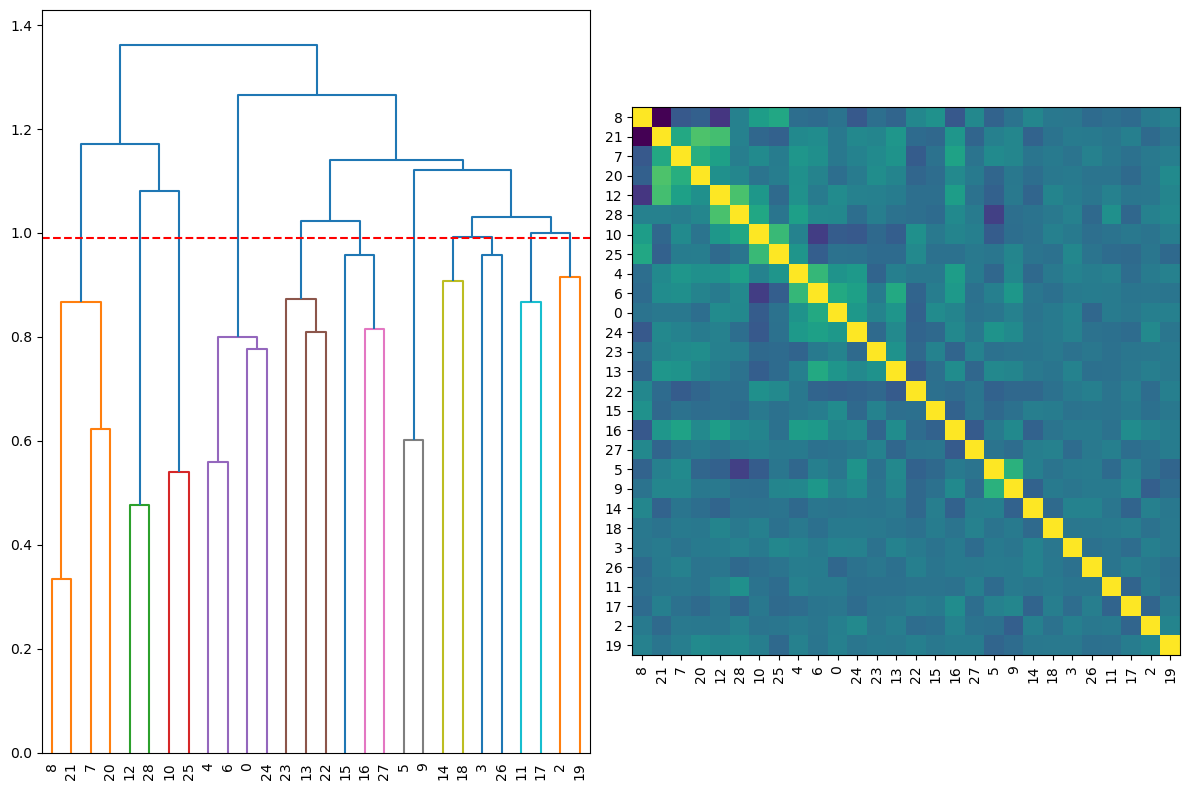

In [19]:
# Борьба с коррелированными признаками
from scipy.stats import spearmanr
from scipy.spatial.distance import squareform
from scipy.cluster import hierarchy

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
corr = spearmanr(X_train).correlation

# Ensure the correlation matrix is symmetric
corr = (corr + corr.T) / 2
np.fill_diagonal(corr, 1)

# We convert the correlation matrix to a distance matrix before performing
# hierarchical clustering using Ward's linkage.
distance_matrix = 1 - np.abs(corr)
dist_linkage = hierarchy.ward(squareform(distance_matrix))
dendro = hierarchy.dendrogram(
    dist_linkage, labels = X_train.columns, 
    ax=ax1, leaf_rotation=90
)
dendro_idx = np.arange(0, len(dendro["ivl"]))

ax1.axhline(y=0.99, color='r', linestyle='--')


# distance_matrix = 1 - np.abs(corr)
# dist_linkage = hierarchy.ward(squareform(distance_matrix))
# dendro = hierarchy.dendrogram(
#     dist_linkage, 
#     ax=ax2, leaf_rotation=90
# )

ax2.imshow(corr[dendro["leaves"], :][:, dendro["leaves"]])
ax2.set_xticks(dendro_idx)
ax2.set_yticks(dendro_idx)
ax2.set_xticklabels(X_train.columns[dendro["leaves"]], rotation="vertical")
ax2.set_yticklabels(X_train.columns[dendro["leaves"]])
fig.tight_layout()
plt.show()

Точность тестовых данных с удаленными признаками: 0.41
MAPE 0.24431398033136165
[0, 1, 2, 4, 6, 9, 10, 11, 12, 13, 14]
Index(['0', '2', '3', '5', '7', '10', '11', '12', '13', '14', '15'], dtype='object')


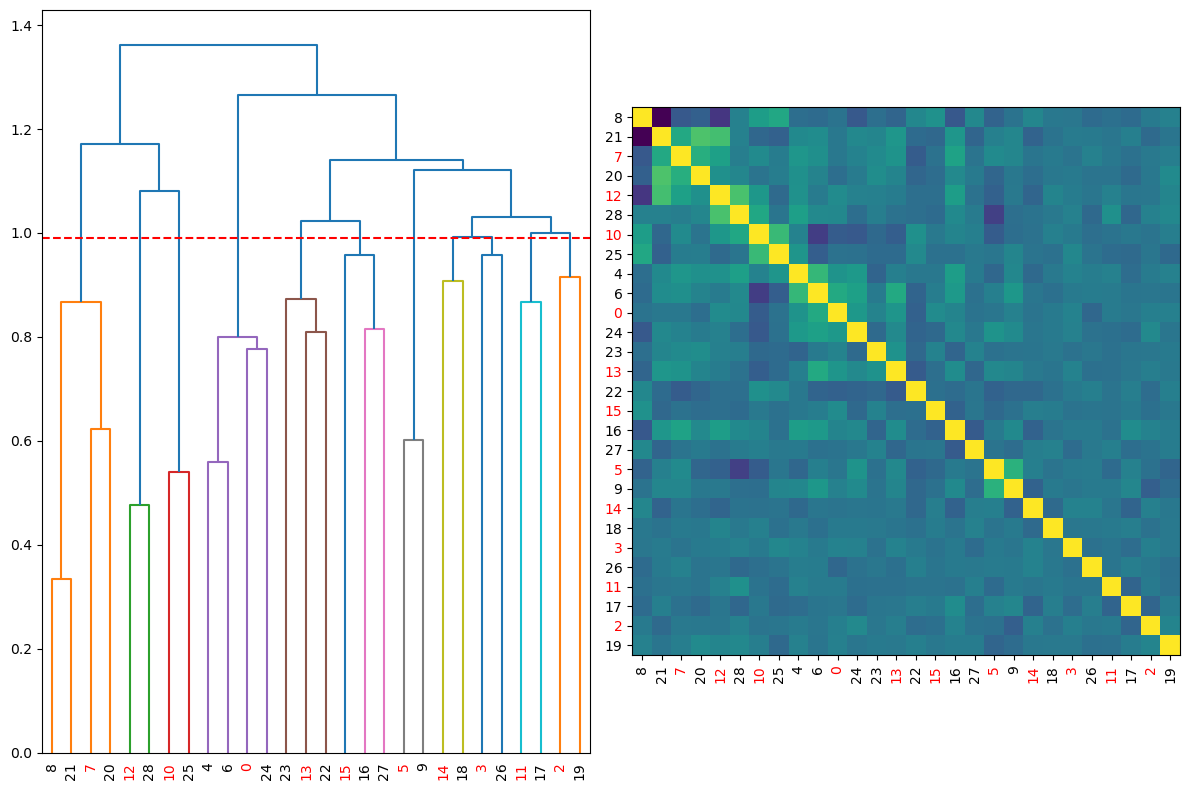

In [20]:
cluster_ids = hierarchy.fcluster(dist_linkage, 0.99, criterion="distance")
cluster_id_to_feature_ids = defaultdict(list)
for idx, cluster_id in enumerate(cluster_ids):
    cluster_id_to_feature_ids[cluster_id].append(idx)
selected_features = [v[0] for v in cluster_id_to_feature_ids.values()]

X_train_sel = X_train.values[:, selected_features]
X_test_sel = X_test.values[:, selected_features]

clf_sel = RandomForestRegressor(n_estimators=500, random_state=42)
clf_sel.fit(X_train_sel, y_train)
print(
    "Точность тестовых данных с удаленными признаками: {:.2f}".format(
        clf_sel.score(X_test_sel, y_test)
    )
)
y_pred_train = clf_sel.predict(X_train_sel)
y_pred = clf_sel.predict(X_test_sel)
print('MAPE', mean_absolute_percentage_error(y_test, y_pred))

selected_features_names = X_train.columns[selected_features]


print(selected_features)
print(selected_features_names)



fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))

dist_linkage = hierarchy.ward(squareform(distance_matrix))
dendro = hierarchy.dendrogram(
    dist_linkage, labels = X_train.columns,
    ax=ax1, leaf_rotation=90
)

ax1.axhline(y=0.99, color='r', linestyle='--')

[ax1.get_xticklabels()[dendro["leaves"].index(i)].set_color('red') for i  in selected_features];

ax2.imshow(corr[dendro["leaves"], :][:, dendro["leaves"]])
ax2.set_xticks(dendro_idx)
ax2.set_yticks(dendro_idx)
ax2.set_xticklabels(X_train.columns[dendro["leaves"]], rotation="vertical")
ax2.set_yticklabels(X_train.columns[dendro["leaves"]])
fig.tight_layout()
[ax2.get_xticklabels()[dendro["leaves"].index(i)].set_color('red') for i  in selected_features];
[ax2.get_yticklabels()[dendro["leaves"].index(i)].set_color('red') for i  in selected_features];
plt.show()

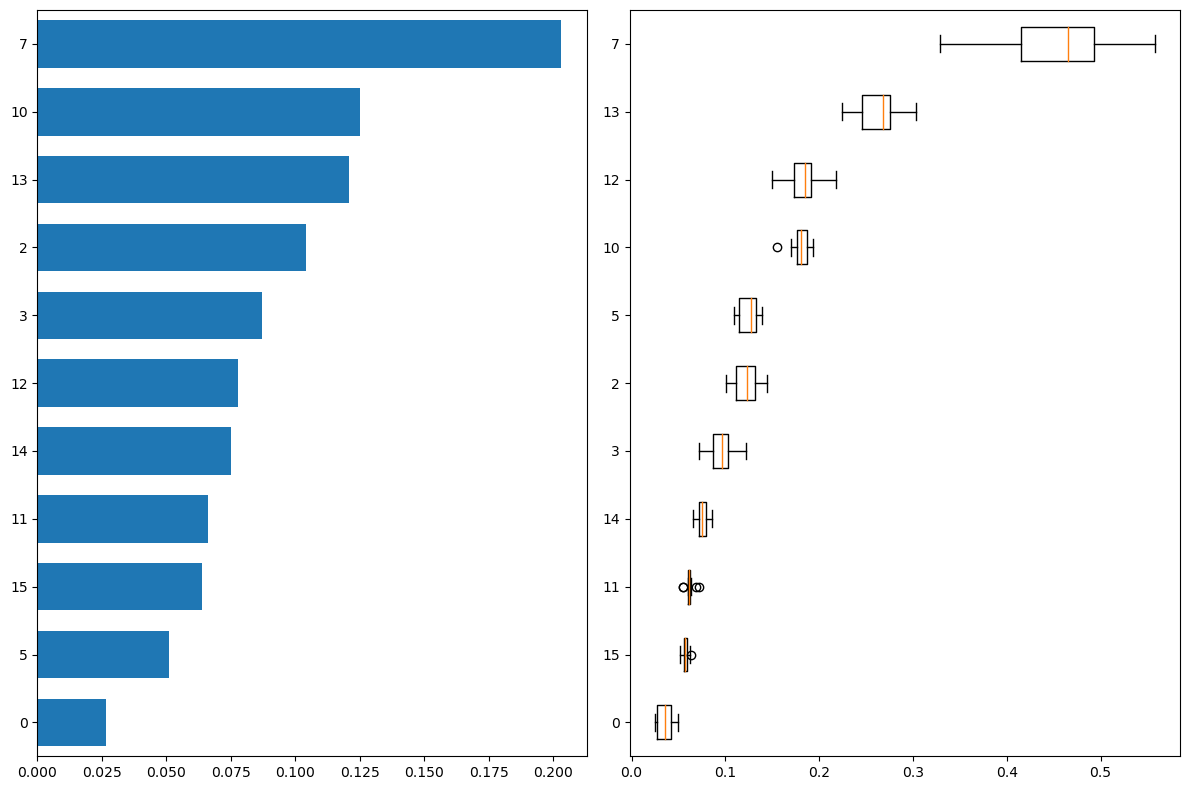

In [21]:
result = permutation_importance(clf_sel, X_train_sel, y_train, n_repeats=10, random_state=42)

perm_sorted_idx = result.importances_mean.argsort()
tree_importance_sorted_idx = np.argsort(clf_sel.feature_importances_)
tree_indices = np.arange(0, len(clf_sel.feature_importances_)) + 0.5

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))

ax1.barh(tree_indices, clf_sel.feature_importances_[tree_importance_sorted_idx], height=0.7)
ax1.set_yticks(tree_indices)
ax1.set_yticklabels(selected_features_names[tree_importance_sorted_idx])
ax1.set_ylim((0, len(clf_sel.feature_importances_)))
ax2.boxplot(
    result.importances[perm_sorted_idx].T,
    vert=False,
    labels=selected_features_names[perm_sorted_idx],
)
fig.tight_layout()
plt.show()

,mean,std
0,0.026395,0.026289
5,0.051122,0.034751
15,0.063796,0.034624
11,0.066063,0.036461
14,0.074916,0.036710
12,0.077569,0.042359
3,0.086893,0.043811
2,0.104280,0.048624
13,0.120817,0.062834
10,0.125036,0.046894


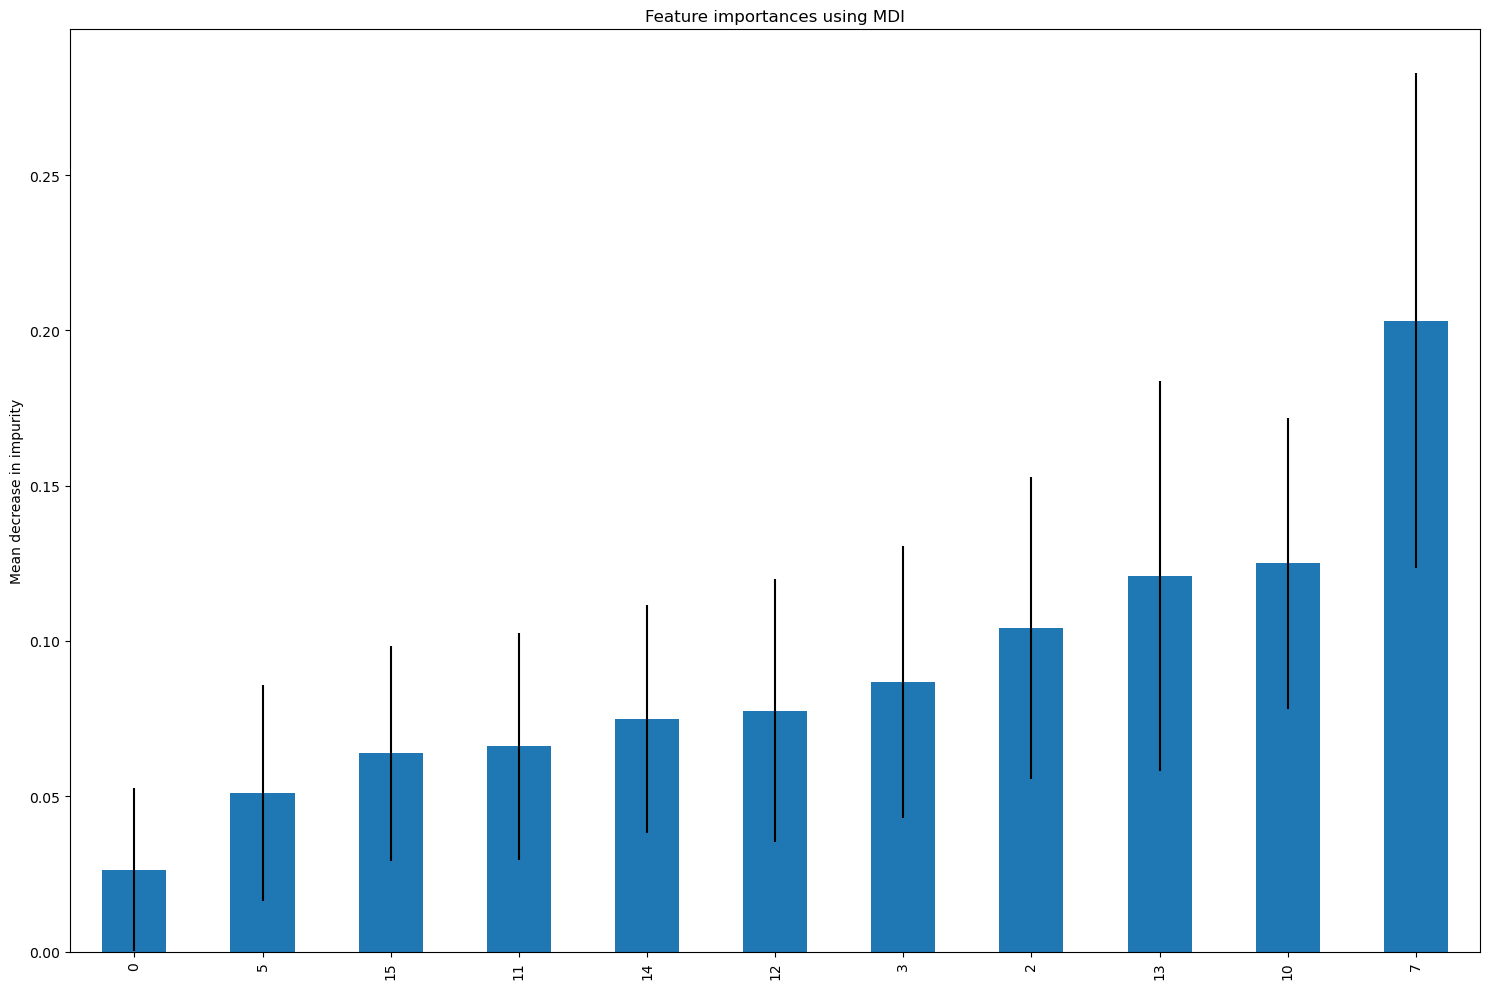

In [22]:
feature_names = selected_features_names[tree_importance_sorted_idx]
forest_importances = pd.DataFrame(clf_sel.feature_importances_, 
                                  index=selected_features_names, 
                                  columns =['mean'])
forest_importances['std'] = np.std([tree.feature_importances_ for tree in clf_sel.estimators_], axis=0)

sort_forest = forest_importances.sort_values(by='mean')


fig, ax = plt.subplots(figsize=(15,10))
col = sort_forest['mean']
yerr = sort_forest['std']
col.plot.bar(yerr=yerr, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

display(sort_forest)

In [26]:
X_train[list(feature_names)]

,0,5,15,11,14,12,3,2,13,10,7
158,0.914613,-1.227755,0.302456,0.421129,-0.761523,0.206429,-1.546424,-0.680282,0.294411,-0.024822,-1.197860
109,0.914613,-1.227755,-1.640501,-1.193963,-1.458590,0.942239,0.141449,-0.560503,0.294411,-1.150536,-1.197860
17,0.914613,0.670067,1.267770,-1.016583,0.204034,-1.262159,0.525050,0.716659,0.834478,0.698322,0.442755
237,0.914613,-1.227755,0.196557,-0.365016,-1.940845,0.206429,1.131503,-1.216963,-1.223587,-0.024822,0.442755
24,-0.316901,-1.227755,-0.355436,1.142206,0.171488,0.206429,-1.556732,-0.639790,-1.223587,-0.024822,0.442755
...,...,...,...,...,...,...,...,...,...,...,...
71,0.914613,-1.227755,0.717011,1.455973,-1.572145,0.206429,-0.487331,-0.951205,0.834478,-0.024822,0.442755
106,0.914613,0.670067,0.915072,-0.958581,0.679350,0.206429,-0.035044,-0.698665,0.834478,-0.024822,0.442755
270,0.914613,0.670067,0.419625,0.498648,-0.687488,0.206429,1.515630,-1.588574,0.834478,-0.024822,-1.197860
348,0.914613,-1.227755,-0.638877,-0.590505,-0.711721,-1.262159,0.224438,0.391284,-1.223587,0.541124,-1.197860


In [27]:
feature_names

Index(['0', '5', '15', '11', '14', '12', '3', '2', '13', '10', '7'], dtype='object')